In [3]:
import pandas as pd
import re as regex

import defFunctions as fs

In [6]:
df = pd.read_csv('Dataset\\Full_Final.csv')
df

C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Thana,District,Accident_Severity,Month,Year,Time,Junction_Type,Traffic_Control,Movement,Divider,...,Road_Class,Road_Feature,Location_Type,Vehicle_Type,Vehicle_Movement,Vehicle_Loading,Vehicle_Defect,Vehicle_Driver_Age,Vehicle_Alcohol,Vehicle_Seat_Belt
0,1,47,F,1,2001,4,2,2,2,2,...,2,1,2,6,6,1,1,32,2,2
1,4,47,F,1,2001,2,1,1,2,2,...,3,1,1,14,6,1,1,42,2,2
2,12,47,G,1,2001,3,1,1,2,2,...,1,1,2,9,6,1,1,25,2,2
3,1,39,F,1,2001,3,1,1,2,2,...,1,1,2,9,6,1,1,35,2,2
4,1,48,F,1,2001,2,1,1,2,2,...,3,1,2,14,6,1,1,?,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43084,8,53,F,8,2015,2,3,1,1,2,...,4,1,2,6,2,2,6,?,2,2
43085,1,53,S,8,2015,3,4,?,1,2,...,2,1,1,2,5,1,7,22,2,2
43086,3,53,F,10,2015,1,7,8,2,2,...,3,1,2,12,6,?,7,?,2,2
43087,15,58,G,5,2015,2,7,8,2,2,...,2,1,2,5,6,?,?,?,?,?


In [7]:
df.columns


Index(['Thana', 'District', 'Accident_Severity', 'Month', 'Year', 'Time',
       'Junction_Type', 'Traffic_Control', 'Movement', 'Divider', 'Weather',
       'Light', 'Road_Geometry', 'Surface_Condition', 'Surface_Type',
       'Surface_Quality', 'Road_Class', 'Road_Feature', 'Location_Type',
       'Vehicle_Type', 'Vehicle_Movement', 'Vehicle_Loading', 'Vehicle_Defect',
       'Vehicle_Driver_Age', 'Vehicle_Alcohol', 'Vehicle_Seat_Belt'],
      dtype='object')

In [8]:
df.isna().sum()

Thana                 0
District              0
Accident_Severity     0
Month                 0
Year                  0
Time                  0
Junction_Type         0
Traffic_Control       0
Movement              0
Divider               0
Weather               0
Light                 0
Road_Geometry         0
Surface_Condition     0
Surface_Type          0
Surface_Quality       0
Road_Class            0
Road_Feature          0
Location_Type         1
Vehicle_Type          1
Vehicle_Movement      1
Vehicle_Loading       1
Vehicle_Defect        1
Vehicle_Driver_Age    1
Vehicle_Alcohol       1
Vehicle_Seat_Belt     1
dtype: int64

In [9]:
df = df.apply(lambda y : y.apply(lambda x : (str(x)).replace(" ", "")))
#df = df.apply(lambda y : y.apply(lambda x : (str(x)).replace("?", "")))

#df = df.apply(lambda y : fs.mappingNum(y))
#df = df.apply(lambda y : fs.replaceByMean(y))

#df.drop('Vehicle_Driver_Age', axis=1, inplace=True)

In [10]:
df['Accident_Severity'] = df['Accident_Severity'].apply(lambda x : 4 if x == 'F' else 3 if x == 'G' else 2 if x == 'M' else 1)

In [11]:
df = df.apply(lambda y : y.apply(lambda x : pd.NA if regex.fullmatch(r'^\d+\.?\d*$', str(x)) == None else x))

In [14]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages
# df.isna().sum()

Vehicle_Driver_Age    0.629790
Vehicle_Defect        0.121678
Vehicle_Loading       0.108311
Vehicle_Alcohol       0.088607
Vehicle_Seat_Belt     0.070227
Vehicle_Type          0.031400
Vehicle_Movement      0.021583
Location_Type         0.017011
Divider               0.015596
Junction_Type         0.013252
Traffic_Control       0.009887
Road_Feature          0.009515
Time                  0.005315
Movement              0.004270
Surface_Quality       0.003412
Road_Geometry         0.003319
Road_Class            0.002971
Surface_Condition     0.002901
Surface_Type          0.002367
Light                 0.002135
Weather               0.000905
District              0.000023
Month                 0.000023
Year                  0.000000
Accident_Severity     0.000000
Thana                 0.000000
dtype: float64

<AxesSubplot:>

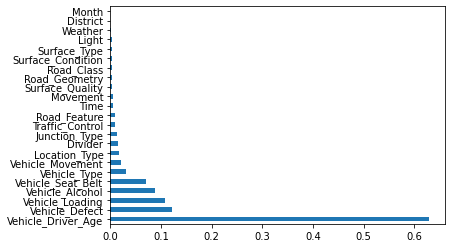

In [15]:
#df.fillna(method='ffill', inplace=True)
# missing_percentages.plot()
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [151]:
df.isna().sum()

In [152]:
df

,Thana,District,Accident_Severity,Month,Year,Time,Junction_Type,Traffic_Control,Movement,Divider,...,Road_Class,Road_Feature,Location_Type,Vehicle_Type,Vehicle_Movement,Vehicle_Loading,Vehicle_Defect,Vehicle_Driver_Age,Vehicle_Alcohol,Vehicle_Seat_Belt
0,1,47,4,1,2001,4,2,2,2,2,...,2,1,2,6,6,1,1,32,2,2
1,4,47,4,1,2001,2,1,1,2,2,...,3,1,1,14,6,1,1,42,2,2
2,12,47,3,1,2001,3,1,1,2,2,...,1,1,2,9,6,1,1,25,2,2
3,1,39,4,1,2001,3,1,1,2,2,...,1,1,2,9,6,1,1,35,2,2
4,1,48,4,1,2001,2,1,1,2,2,...,3,1,2,14,6,1,1,<NA>,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43084,8,53,4,8,2015,2,3,1,1,2,...,4,1,2,6,2,2,6,<NA>,2,2
43085,1,53,1,8,2015,3,4,<NA>,1,2,...,2,1,1,2,5,1,7,22,2,2
43086,3,53,4,10,2015,1,7,8,2,2,...,3,1,2,12,6,<NA>,7,<NA>,2,2
43087,15,58,3,5,2015,2,7,8,2,2,...,2,1,2,5,6,<NA>,<NA>,<NA>,<NA>,<NA>


In [153]:
df.to_csv('Dataset\\Full_Final_Cleaned.csv', index=False)